In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats


In [2]:
# get sample sizes

print(0.075*593)
print(0.01*181978)

num_inf = 45
num_norm = 1820

44.475
1819.78


In [3]:
np.random.seed(422)

# define variables
norm_mu = 30
inf_mu = 30
sigma = 3
increment = norm_mu*.005
iter = 40

results = np.empty((iter + 1, 3))

# simulate data and perform t-tests
for i in range(iter + 1):
    inf = np.random.normal(inf_mu, sigma, num_inf)
    norm = np.random.normal(norm_mu, sigma, num_norm)
    t = stats.ttest_ind(inf, norm)
    results[i] = [inf_mu-norm_mu, t[0], t[1]]
    inf_mu += increment
                  
print(results)
    

[[ 0.00000000e+00 -9.64661983e-01  3.34839342e-01]
 [ 1.50000000e-01 -1.64437138e+00  1.00268228e-01]
 [ 3.00000000e-01  1.86678775e+00  6.20882069e-02]
 [ 4.50000000e-01  8.59443801e-01  3.90206286e-01]
 [ 6.00000000e-01  1.71004441e+00  8.74241679e-02]
 [ 7.50000000e-01 -1.02102293e+00  3.07376138e-01]
 [ 9.00000000e-01  2.75911894e+00  5.85243028e-03]
 [ 1.05000000e+00  1.78725326e+00  7.40590824e-02]
 [ 1.20000000e+00  2.75961558e+00  5.84357872e-03]
 [ 1.35000000e+00  3.95537756e+00  7.92748506e-05]
 [ 1.50000000e+00  2.07093512e+00  3.85022785e-02]
 [ 1.65000000e+00  3.07806334e+00  2.11387691e-03]
 [ 1.80000000e+00  4.70753162e+00  2.69237232e-06]
 [ 1.95000000e+00  4.40464224e+00  1.11977197e-05]
 [ 2.10000000e+00  4.03400716e+00  5.70480778e-05]
 [ 2.25000000e+00  5.75245754e+00  1.02590756e-08]
 [ 2.40000000e+00  5.23280746e+00  1.85778416e-07]
 [ 2.55000000e+00  6.59217463e+00  5.62670629e-11]
 [ 2.70000000e+00  6.39168471e+00  2.06802125e-10]
 [ 2.85000000e+00  6.94797901e+

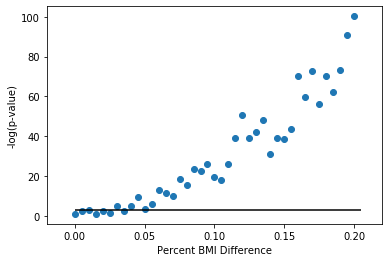

In [4]:
import matplotlib.pyplot as plt

n = 300

# plot results
plt.scatter(results[:,0]/norm_mu, -np.log(results[:,2]))
plt.xlabel("Percent BMI Difference")
plt.ylabel("-log(p-value)")
# p = 0.05
plt.hlines(-np.log(0.05), xmin = 0, xmax = (inf_mu-norm_mu)/norm_mu)

plt.show()


In [26]:
## AVERAGES ##

np.random.seed(422)

# define variables
norm_mu = 30
inf_mu = 30
sigma = 3
increment = norm_mu*.005
iter = 40

results_avg = np.empty((iter + 1, 3))

# simulate data and perform t-tests
for i in range(iter + 1):
    t = np.empty((1000, 2))
    # average for each new value of inf_mu
    for j in range(1000):
        inf = np.random.normal(inf_mu, sigma, num_inf)
        norm = np.random.normal(norm_mu, sigma, num_norm)
        t[j] = stats.ttest_ind(inf, norm)
    t_0 = np.average(t[:,0])
    t_1 = np.average(t[:,1])
    results_avg[i] = [inf_mu-norm_mu, t_0, t_1]
    inf_mu += increment
                  
print(results_avg)
    

[[ 0.00000000e+00 -1.92691800e-03  4.94360596e-01]
 [ 1.50000000e-01  3.06568775e-01  4.79277280e-01]
 [ 3.00000000e-01  6.69151702e-01  4.46107110e-01]
 [ 4.50000000e-01  1.00923710e+00  3.67390470e-01]
 [ 6.00000000e-01  1.33780259e+00  2.85498171e-01]
 [ 7.50000000e-01  1.70127986e+00  2.08706225e-01]
 [ 9.00000000e-01  1.91871081e+00  1.61406419e-01]
 [ 1.05000000e+00  2.31361765e+00  9.13480027e-02]
 [ 1.20000000e+00  2.74886928e+00  4.94256071e-02]
 [ 1.35000000e+00  2.99553218e+00  3.54551568e-02]
 [ 1.50000000e+00  3.28122507e+00  2.14124108e-02]
 [ 1.65000000e+00  3.63876156e+00  9.98338466e-03]
 [ 1.80000000e+00  3.97871147e+00  4.61459640e-03]
 [ 1.95000000e+00  4.26783350e+00  3.20109774e-03]
 [ 2.10000000e+00  4.66322712e+00  8.37959366e-04]
 [ 2.25000000e+00  5.00983249e+00  3.39963924e-04]
 [ 2.40000000e+00  5.35533974e+00  2.04044001e-04]
 [ 2.55000000e+00  5.65662772e+00  6.00056885e-05]
 [ 2.70000000e+00  5.94932225e+00  2.43885792e-05]
 [ 2.85000000e+00  6.24602143e+

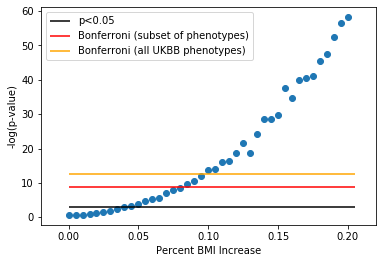

In [34]:
## AVERAGES ##

# plot results
plt.scatter(results_avg[:,0]/norm_mu, -np.log(results_avg[:,2]))
plt.xlabel("Percent BMI Increase")
plt.ylabel("-log(p-value)")
# p = 0.05
plt.hlines(-np.log(0.05), xmin = 0, xmax = (inf_mu-norm_mu)/norm_mu, label='p<0.05')
# p = 0.05 / 300 (Bonferroni - subset)
plt.hlines(-np.log(0.05/300), xmin = 0, xmax = (inf_mu-norm_mu)/norm_mu, color = "RED", label = "Bonferroni (subset of phenotypes)")
# p = 0.05 / 17,000 (Bonferroni - all)
plt.hlines(-np.log(0.05/17000), xmin = 0, xmax = (inf_mu-norm_mu)/norm_mu, color = "ORANGE", label = "Bonferroni (all UKBB phenotypes)")

plt.legend()
plt.savefig("Scatterplot1.png")
plt.show()


In [37]:
# find passing mean difference vals

pass_vec = []
for i in range(iter + 1): 
    if results_avg[i,2] <= 0.05:
        pass_vec.append([results_avg[i,0]/norm_mu,results_avg[i,2]])

b_pass_vec = []
for i in range(iter + 1): 
    if results_avg[i,2] <= (0.05/300):
        b_pass_vec.append([results_avg[i,0]/norm_mu,results_avg[i,2]])
        
b_pass_vec_2 = []
for i in range(iter + 1): 
    if results_avg[i,2] <= (0.05/17000):
        b_pass_vec_2.append([results_avg[i,0]/norm_mu,results_avg[i,2]])
      
pass_vec = np.array(pass_vec)
b_pass_vec = np.array(b_pass_vec)
b_pass_vec_2 = np.array(b_pass_vec_2)

print(pass_vec[:,0])
print(b_pass_vec[:,0])
print(b_pass_vec_2[:,0])

[0.04  0.045 0.05  0.055 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095
 0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155
 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.195 0.2  ]
[0.085 0.09  0.095 0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14
 0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.195 0.2  ]
[0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155
 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.195 0.2  ]


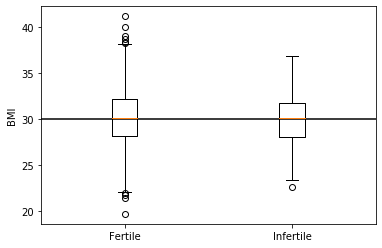

In [15]:
# plot null hypothesis box plots (no diff from normal pop)

norm_mu = 30
inf_mu = 30
sigma = 3
inf_null = np.random.normal(inf_mu, sigma, num_inf)
norm_null = np.random.normal(norm_mu, sigma, num_norm)
t_null = stats.ttest_ind(inf, norm)

data = [norm_null, inf_null]

plt.boxplot(data)
plt.hlines(30, xmin = 0.5, xmax = 2.5)
plt.xticks([1, 2], ['Fertile', 'Infertile'])
plt.ylabel("BMI")
plt.savefig("Boxplot1.png")
plt.show()



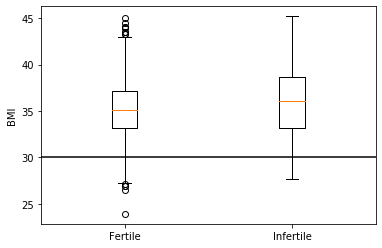

In [16]:
# plot null hypothesis box plots (both diff from normal pop)

norm_mu = 30
inf_mu = 30
sigma = 3
inf_null = np.random.normal(inf_mu, sigma, num_inf)
norm_null = np.random.normal(norm_mu, sigma, num_norm)
t_null = stats.ttest_ind(inf, norm)

data = [norm_null, inf_null]
data = np.array(data)+5

plt.boxplot(data)
plt.hlines(30, xmin = 0.5, xmax = 2.5)
plt.xticks([1, 2], ['Fertile', 'Infertile'])
plt.ylabel("BMI")
plt.savefig("Boxplot2.png")
plt.show()


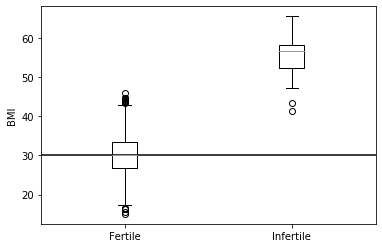

In [17]:
# plot 20% increase box plots (one diff from normal)

data = [norm, inf]
plt.boxplot(data)
plt.hlines(30, xmin = 0.5, xmax = 2.5)
plt.xticks([1, 2], ['Fertile', 'Infertile'])
plt.ylabel("BMI")
plt.savefig("Boxplot3.png")
plt.show()

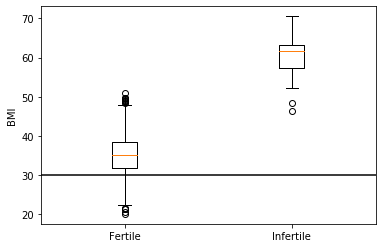

In [18]:
# plot 20% increase box plots (one diff from normal)

data = [norm, inf]
data = np.array(data)+5
plt.boxplot(data)
plt.hlines(30, xmin = 0.5, xmax = 2.5)
plt.xticks([1, 2], ['Fertile', 'Infertile'])
plt.ylabel("BMI")
plt.savefig("Boxplot4.png")
plt.show()

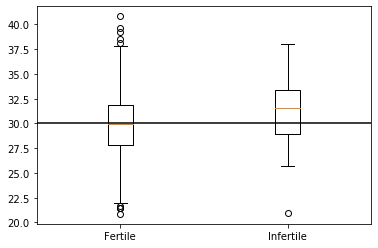

In [12]:
# plot 4% increase box plots (more borderline)

norm_mu = 30
inf_mu = 30 + 8*(norm_mu*.005)
sigma = 3
inf_null = np.random.normal(inf_mu, sigma, num_inf)
norm_null = np.random.normal(norm_mu, sigma, num_norm)
t_null = stats.ttest_ind(inf_null, norm_null)

data = [norm_null, inf_null]

plt.boxplot(data)
plt.hlines(30, xmin = 0.5, xmax = 2.5)
plt.xticks([1, 2], ['Fertile', 'Infertile'])
plt.show()


In [38]:
## STANDARD DEVIATION vs. LOWEST EXPECTED REJECTED PERCENT INCREASE ##

# define variables
norm_mu = 30
inf_mu = 30
sigma = 1
increment = .25
increment2 = norm_mu*.005
iter = 16
iter2 = 160

results_sd = np.empty((iter + 1, 4))

# simulate data and perform t-tests

for s in range(iter + 1):
    results_temp = np.empty((iter2 + 1, 3))
    norm_mu = 30
    inf_mu = 30
    # repeat previous process for each value of sigma
    for i in range(iter2 + 1):
        t = np.empty((100, 2))
        # average for each new value of inf_mu
        for j in range(100):
            inf = np.random.normal(inf_mu, sigma, num_inf)
            norm = np.random.normal(norm_mu, sigma, num_norm)
            t[j] = stats.ttest_ind(inf, norm)
        t_0 = np.average(t[:,0])
        t_1 = np.average(t[:,1])
        results_temp[i] = [inf_mu-norm_mu, t_0, t_1]
        inf_mu += increment2
    # find smallest significant value (normal)
    v = []
    for i in range(iter2 + 1): 
        if results_temp[i,2] <= 0.05:
            v.append([results_temp[i,0]/norm_mu,results_temp[i,2]])
    v = np.array(v)
    # find smallest significant value (Bonferroni)
    b = []
    for i in range(iter2 + 1): 
        if results_temp[i,2] <= (0.05/300):
            b.append([results_temp[i,0]/norm_mu,results_temp[i,2]])
    b = np.array(b)
    b2 = []
    for i in range(iter2 + 1): 
        if results_temp[i,2] <= (0.05/300):
            b2.append([results_temp[i,0]/norm_mu,results_temp[i,2]])
    b2 = np.array(b2)
    print(sigma)
    results_sd[s] = [sigma, v[0,0], b[0,0], b2[0,0]]
    sigma += increment
    
print(results_sd)


1
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75
5.0
[[1.    0.015 0.03  0.03 ]
 [1.25  0.02  0.035 0.035]
 [1.5   0.025 0.04  0.04 ]
 [1.75  0.03  0.05  0.05 ]
 [2.    0.03  0.055 0.055]
 [2.25  0.03  0.06  0.06 ]
 [2.5   0.035 0.065 0.065]
 [2.75  0.04  0.07  0.07 ]
 [3.    0.045 0.08  0.08 ]
 [3.25  0.045 0.095 0.095]
 [3.5   0.05  0.1   0.1  ]
 [3.75  0.055 0.105 0.105]
 [4.    0.055 0.105 0.105]
 [4.25  0.06  0.105 0.105]
 [4.5   0.065 0.115 0.115]
 [4.75  0.07  0.125 0.125]
 [5.    0.07  0.13  0.13 ]]


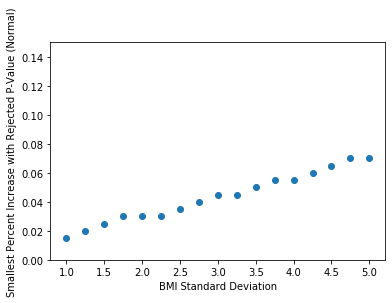

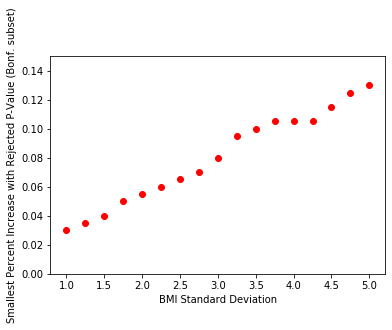

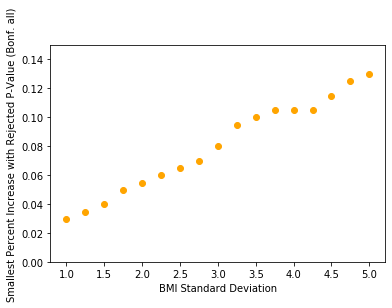

In [42]:
# plot sd vs. smallest rejected p-value

# plot results (normal)
plt.scatter(results_sd[:,0], results_sd[:,1])
plt.xlabel("BMI Standard Deviation")
plt.ylabel("Smallest Percent Increase with Rejected P-Value (Normal)")
plt.ylim([0, 0.15])
plt.savefig("Scatterplot2.png")
plt.show()

# plot results (Bonferroni - subset)
plt.scatter(results_sd[:,0], results_sd[:,2], color = "RED")
plt.xlabel("BMI Standard Deviation")
plt.ylabel("Smallest Percent Increase with Rejected P-Value (Bonf. subset)")
plt.ylim([0, 0.15])
plt.savefig("Scatterplot3.png")
plt.show()

# plot results (Bonferroni - all)
plt.scatter(results_sd[:,0], results_sd[:,3], color = "ORANGE")
plt.xlabel("BMI Standard Deviation")
plt.ylabel("Smallest Percent Increase with Rejected P-Value (Bonf. all)")
plt.ylim([0, 0.15])
plt.savefig("Scatterplot4.png")
plt.show()


